In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Download data
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"


--2021-12-13 16:43:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.5’

auto-mpg.data.5     100%[===================>]  29,58K   122KB/s    in 0,2s    

2021-12-13 16:43:57 (122 KB/s) - ‘auto-mpg.data.5’ saved [30286/30286]



In [124]:
# Column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

# Reading the .data file using pandas
df = pd.read_csv('./ground_truth', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

# Making a copy of the dataframe
data = df.copy()


In [125]:
print('Shape of dataset:', data.shape,'\n')
print(data.head(), '\n')
print(data.info())


Shape of dataset: (398, 8) 

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64

In [ ]:
# Aim: predict MPG value for a vehicle

In [117]:
# Find # of empty values for each feature
empty_vals_table = pd.concat([data.isnull().sum(), 100 * data.isnull().sum() / len(data)], axis=1, sort=False)
empty_vals_table.columns = ['# of empty values', '% of empty values' ]


print(empty_vals_table, '\n')


              # of empty values  % of empty values
MPG                           0           0.000000
Cylinders                     0           0.000000
Displacement                  0           0.000000
Horsepower                    6           1.507538
Weight                        0           0.000000
Acceleration                  0           0.000000
Model Year                    0           0.000000
Origin                        0           0.000000 



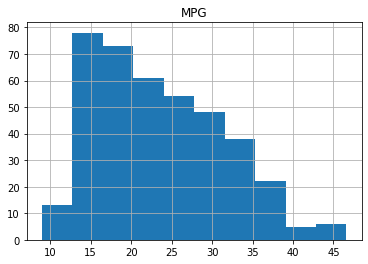

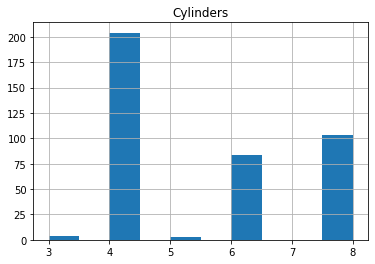

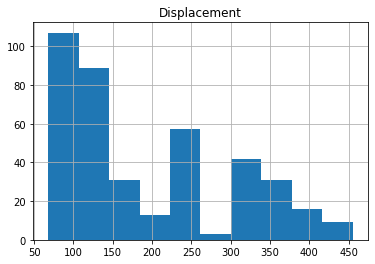

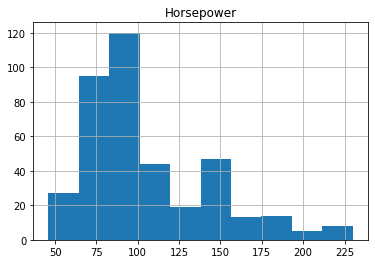

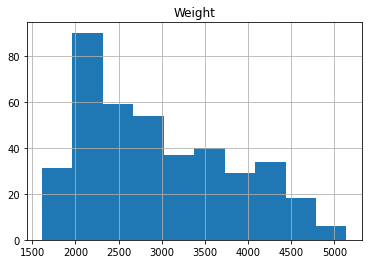

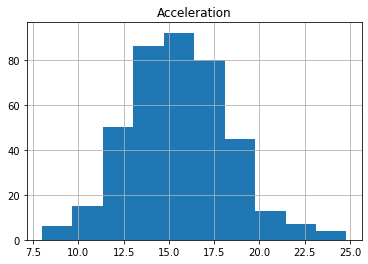

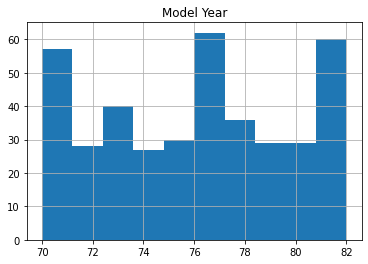

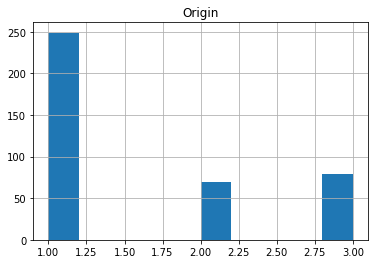

In [118]:
# Variable horsepower contains 6 Null values
for i in data.columns:
    data.hist(column=i)

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


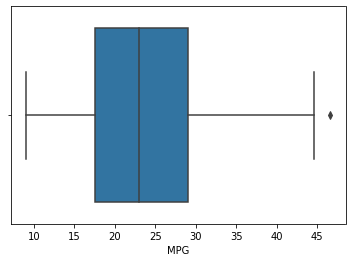

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


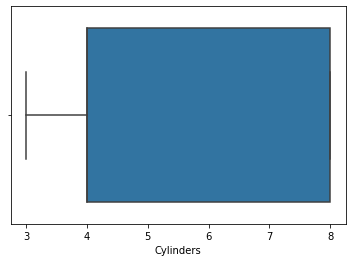

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


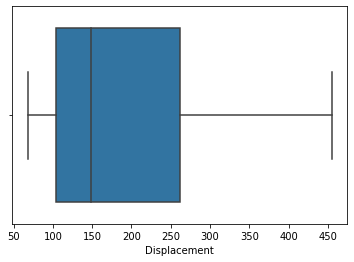

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


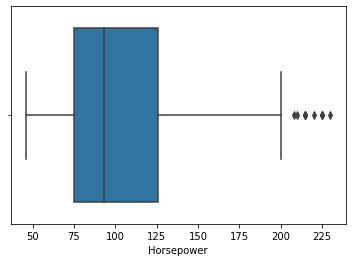

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


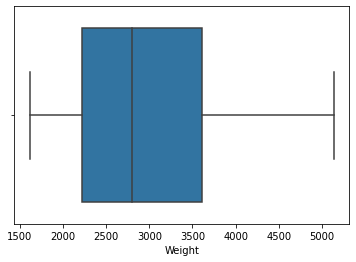

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


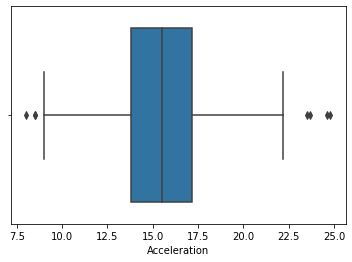

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


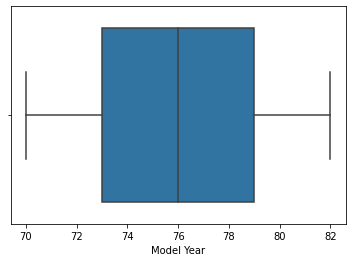

/home/aspa/Desktop/FuelConsumption/notebook/jupyterenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


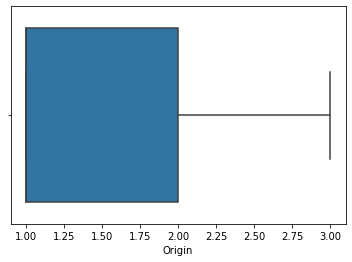

In [27]:
# Variable horsepower contains 6 Null values
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [119]:
# Statistics
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [126]:
# Data imputation 
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [127]:
# Distribution of categorical data
print(data["Cylinders"].value_counts() / len(data),'\n')
print(data['Origin'].value_counts())

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64 

1    249
3     79
2     70
Name: Origin, dtype: int64


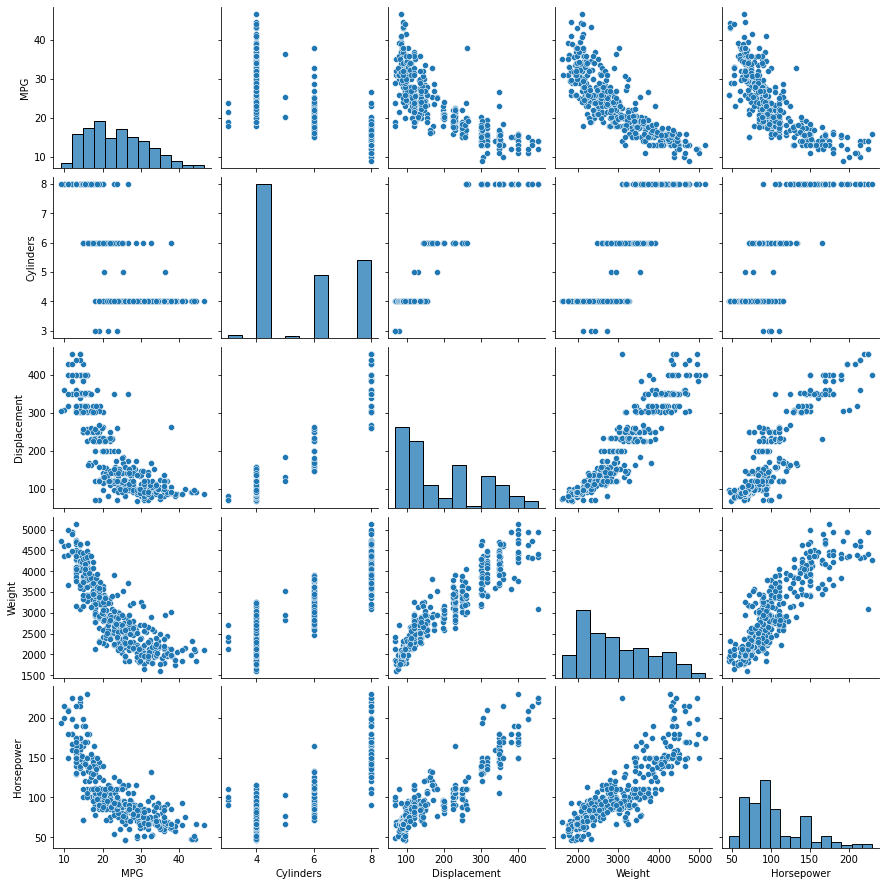

In [128]:
# Correlation plot
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="auto")

# The MPG column (our target variable) is negatively correlated with the displacement, weight,
# and horsepower features

In [132]:
# Split into train/test set
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

print('Random sampling:\n')
print(train_set['Cylinders'].value_counts() / len(train_set), '\n')
print(test_set["Cylinders"].value_counts() / len(test_set))

Random sampling:

4    0.509434
8    0.248428
6    0.220126
3    0.012579
5    0.009434
Name: Cylinders, dtype: float64 

4    0.525
8    0.300
6    0.175
Name: Cylinders, dtype: float64


In [134]:
# Stratified Sampling: obtain a sample population that best represents the entire population being studied.
# Involves dividing the entire dataset into homogeneous groups called strata.

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for strat_train_index, strat_test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[strat_train_index]
    strat_test_set = data.loc[strat_test_index]

print('Stratified sampling:\n')
print(strat_train_set['Cylinders'].value_counts() / len(strat_train_set), '\n')
print(strat_test_set["Cylinders"].value_counts() / len(strat_test_set))


Stratified sampling:

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64 

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64


In [135]:
# Print correlation matrix
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG             1.000000
Model Year      0.579267
Origin          0.563450
Acceleration    0.420289
Horsepower     -0.773453
Cylinders      -0.775396
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64

In [136]:
# Create new features and check correlation
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)


# acceleration_on_power and acceleration_on_cyl are two new variables
# which turned out to be more positively correlated than the original ones

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64